In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


In [2]:
from google.colab import files
uploaded = files.upload()

Saving West_australia.csv to West_australia.csv


In [3]:
#df = pd.read_csv("../Datasets/West_australia.csv")
df=read_csv("West_australia.csv")
df = df.dropna(axis="rows", how="any")
df= df[df['rainfall_mm'] != 0]
df

,rainfall_mm,min_temp_C,max_temp_C,daily_avg,daily_range,uv_MJ_m*m
16690,3.6,10.3,22.1,16.20,11.8,25.4
16700,2.0,20.1,30.5,25.30,10.4,7.5
16701,1.4,20.2,31.9,26.05,11.7,31.0
16703,0.6,17.7,25.7,21.70,8.0,30.2
16708,3.4,15.9,22.6,19.25,6.7,2.6
...,...,...,...,...,...,...
26498,5.0,8.2,22.5,15.35,14.3,30.2
26515,0.6,13.7,24.5,19.10,10.8,30.7
26523,7.0,17.8,24.7,21.25,6.9,18.4
26538,0.4,16.3,23.2,19.75,6.9,26.8


<Axes: >

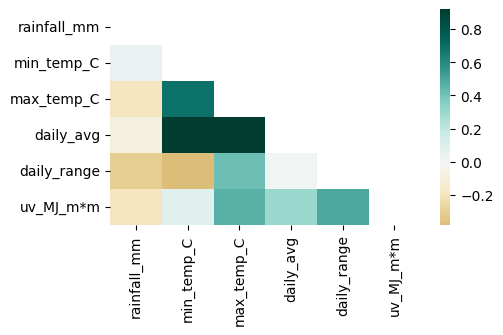

In [8]:
fig, ax=plt.subplots(figsize=(5,2.8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,center=0, cmap='BrBG')

#ax.set_title('Correlation of weather variable West Australia', fontsize=18)

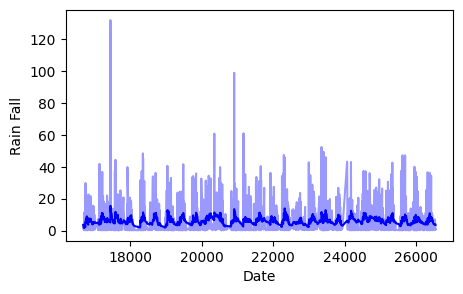

In [ ]:
df['rainfall_mm'].to_frame()
f, ax = plt.subplots(figsize=(6, 6))
f.set_figwidth(5)
f.set_figheight(3)
p=df["rainfall_mm"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=df['rainfall_mm'].ewm(span=24).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('Rain Fall')
plt.savefig(r'./Aotiz.jpg', dpi=400)
plt.show()

In [ ]:
target = df['rainfall_mm']
features = df.drop('rainfall_mm', axis=1)

In [ ]:
# perform PCA on the features
pca = PCA(n_components=3)
pca.fit(features)
pca_features = pca.transform(features)

In [ ]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_features = pca_features[:train_size]
train_target = target[:train_size]
test_features = pca_features[train_size:]
test_target = target[train_size:]

In [ ]:
# train a linear regression model on the training data
lr = LinearRegression()
lr.fit(train_features, train_target)

LinearRegression()

In [ ]:
# make predictions on the testing data
predictions = lr.predict(test_features)

In [ ]:
# evaluate the model's performance
rmse = np.mean((predictions - test_target)**2)
print(f'Mean Squared Error: {rmse:.2f}')

Mean Squared Error: 59.26


In [ ]:
r2_score(test_target,predictions)

0.09985977715114758

<ipython-input-48-1a307bd38bdd>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(test_target, fit_fn(test_target), '--k', linewidth=1.5, c= "Red")


(array([-5. , -2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
 [Text(0, -5.0, '−5.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0')])

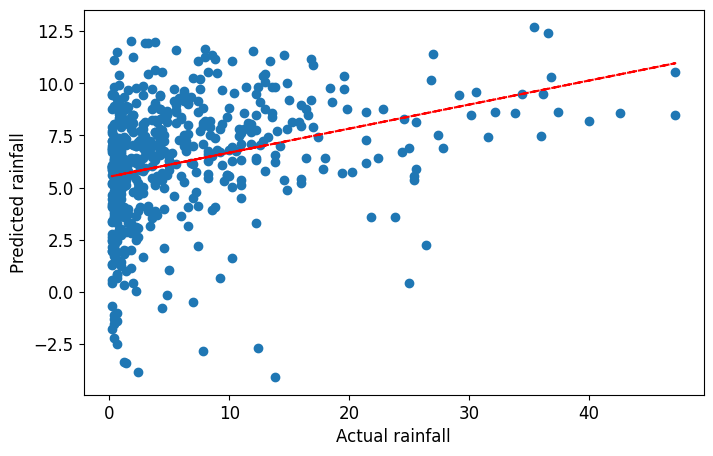

In [ ]:
ax = plt.figure(figsize=(8,5))
plt.scatter(test_target,predictions)
fit = np.polyfit(test_target, predictions, 1)
fit_fn = np.poly1d(fit)
plt.plot(test_target, fit_fn(test_target), '--k', linewidth=1.5, c= "Red")
plt.xlabel('Actual rainfall', fontsize=12)
plt.ylabel('Predicted rainfall',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Predicting Rainfall from Weather Data - West Australia',fontsize=12)

In [ ]:
pred_y_df = pd.DataFrame({'Actual_Value':test_target,'Predictd_Value':predictions, 'Difference':test_target-predictions})
predit=pred_y_df[0:20]
predit

,Actual_Value,Predictd_Value,Difference
24611,13.0,8.791351,4.208649
24612,4.2,7.801689,-3.601689
24613,0.4,5.186215,-4.786215
24614,3.6,8.765729,-5.165729
24615,12.6,7.056684,5.543316
24619,13.0,10.059061,2.940939
24620,3.8,7.032735,-3.232735
24621,4.6,2.113739,2.486261
24631,0.4,3.801144,-3.401144
24634,0.4,1.725878,-1.325878


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

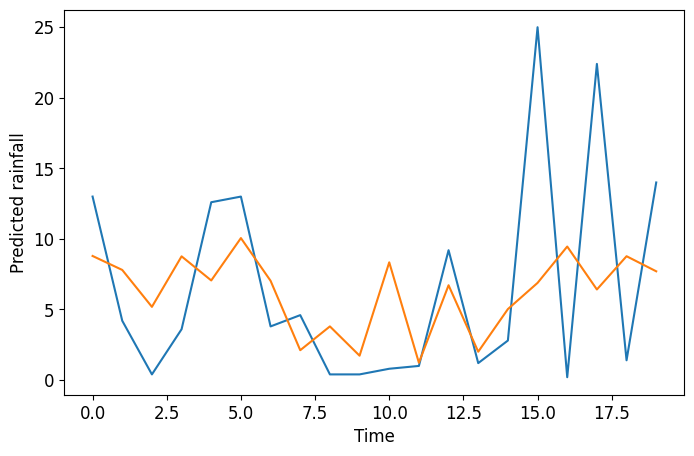

In [ ]:
ax = plt.figure(figsize=(8,5))
plt.plot(predit["Actual_Value"].values)
plt.plot(predit["Predictd_Value"].values)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Predicted rainfall',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Predicting Rainfall from Weather Data - West Australia',fontsize=12)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50')])

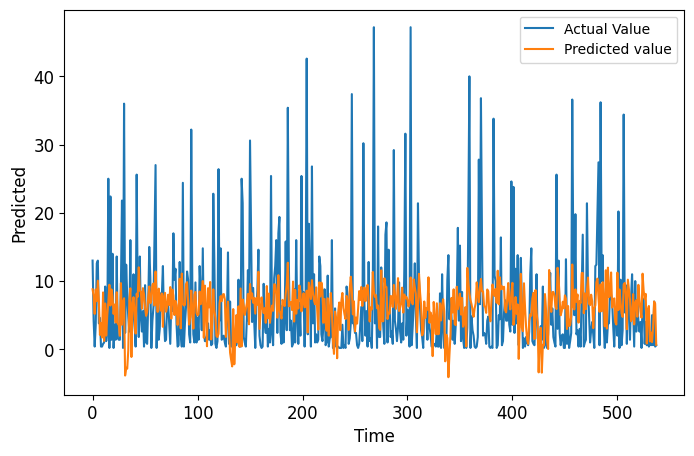

In [ ]:
ax = plt.figure(figsize=(8,5))
plt.plot(pred_y_df["Actual_Value"].values, label ='Actual Value')
plt.plot(pred_y_df["Predictd_Value"].values, label='Predicted value')
plt.legend()
plt.xlabel('Time', fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Predicting Rainfall from Weather Data - West Australia',fontsize=12)